https://colab.research.google.com/notebooks/basic_features_overview.ipynb#scrollTo=JyG45Qk3qQLS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display

# Generate synthetic dataset
np.random.seed(42)  # for reproducibility
heights = np.random.normal(1.75, 0.1, 300)  # Average height in meters with some deviation
weights = np.random.normal(70, 10, 300)  # Average weight in kg with some deviation
bmi = weights / (heights**2) + np.random.normal(0, 1, 300)  # Adding some noise

data = pd.DataFrame({
    'Height': heights,
    'Weight': weights,
    'BMI': bmi
})

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Height', 'Weight']], data['BMI'], test_size=0.2, random_state=42)

print(data.shape)
# Display the first few rows of the dataset
print(data.head())


(300, 3)
     Height     Weight        BMI
0  1.799671  61.710050  19.810256
1  1.736174  64.398190  20.442071
2  1.814769  77.472936  24.393401
3  1.902303  76.103703  22.385983
4  1.726585  69.790984  23.824629


# The BMI Predictor: A Linear Regression Journey

Welcome to "The BMI Predictor"! In this interactive game, you'll learn how to use linear regression to predict a person's Body Mass Index (BMI) based on their height and weight.

## Getting Started

First, let's take a look at our dataset. We've generated some synthetic data representing the height (in meters), weight (in kilograms), and BMI of 300 individuals.

Run the cell above to see the first few rows of our dataset.

## Your Challenge

Your challenge is to build a linear regression model that accurately predicts an individual's BMI based on their height and weight.

But first, let's visualize our data to understand the relationship between height, weight, and BMI.


## Let's Begin!

## First let's Look at the Data

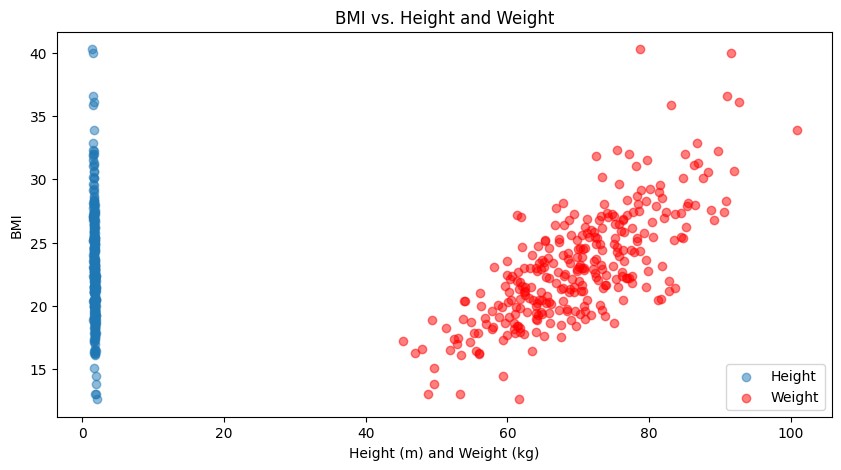

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Height'], data['BMI'], alpha=0.5, label='Height')
plt.scatter(data['Weight'], data['BMI'], alpha=0.5, color='r', label='Weight')
plt.title('BMI vs. Height and Weight')
plt.xlabel('Height (m) and Weight (kg)')
plt.ylabel('BMI')
plt.legend()
plt.show()


## Build Your Model

It's time to build your linear regression model. We will start by guessing the coefficients for height and weight. Don't worry if you're not sure about this; part of the game is learning by doing!

Use the sliders below to adjust your model's coefficients. Once you're ready, run the cell to see how well your model performs.


In [ ]:
# Create interactive sliders for coefficients
height_coeff = widgets.FloatSlider(value=0.5, min=-10, max=10, step=0.1, description='Height Coeff:')
weight_coeff = widgets.FloatSlider(value=0.5, min=-10, max=10, step=0.1, description='Weight Coeff:')
intercept = widgets.FloatSlider(value=0, min=-100, max=100, step=1, description='Intercept:')

ui = widgets.HBox([height_coeff, weight_coeff, intercept])

def update_model(height_coeff, weight_coeff, intercept):
    predicted_bmi = (X_test['Height'] * height_coeff) + (X_test['Weight'] * weight_coeff) + intercept
    plt.scatter(y_test, predicted_bmi, color='red', alpha=0.5, label='Predicted BMI')
    plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual BMI')
    plt.xlabel('Actual BMI')
    plt.ylabel('BMI Value')
    plt.legend()
    plt.title('Actual vs. Predicted BMI')
    plt.show()

# Display interactive controls
out = widgets.interactive_output(update_model, {'height_coeff': height_coeff, 'weight_coeff': weight_coeff, 'intercept': intercept})

display(ui, out)

Output()

# Great job on adjusting your model! Now, let's see how a linear regression model would automatically find these coefficients for us.

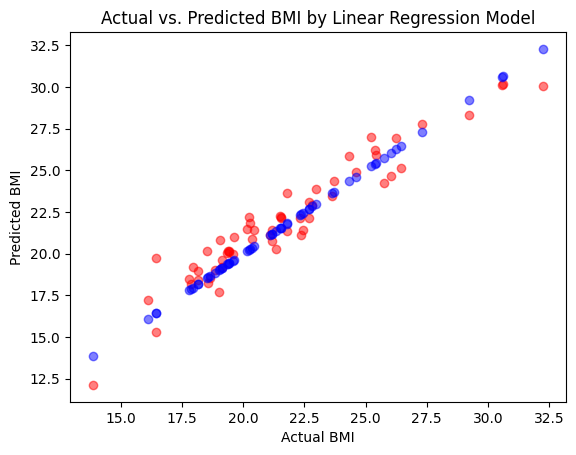

Model coefficients: Height - -27.075442273034394, Weight - 0.32835895740120846
Model intercept: 47.62692945416364


In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Predicted BMI')
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual BMI')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Actual vs. Predicted BMI by Linear Regression Model')
plt.show()

# Display the coefficients found by the linear regression model
print(f"Model coefficients: Height - {model.coef_[0]}, Weight - {model.coef_[1]}")
print(f"Model intercept: {model.intercept_}")

## What Did We Learn?

By adjusting the coefficients manually, you've got a feel for how they influence the model's predictions. The `LinearRegression` model from `scikit-learn` https://scikit-learn.org/stable/modules/linear_model.html  automates this process, finding the optimal coefficients for us.

This game is a simplified introduction to linear regression, one of the most fundamental algorithms in machine learning. The real power of linear regression, and machine learning in general, comes from its ability to learn from data automatically, identifying patterns that are not immediately obvious.

## Explore Further

Feel free to modify the dataset, experiment with different features, or even use real-world datasets to see how linear regression can be applied in various scenarios. The journey into machine learning is full of exciting challenges and endless possibilities!

Thank you for playing "The BMI Predictor: A Linear Regression Journey"!
